In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/content/drive/MyDrive/chrun prediction/Admission_Predict.csv")

In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(columns=['Serial No.'],inplace=True)

In [8]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
df.rename(columns={'Chance of Admit ':'Chance of Admit'},inplace=True)

In [10]:
X=df.drop(columns=['Chance of Admit'],axis=1)
Y=df['Chance of Admit']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.fit_transform(X_test)


In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Input


In [14]:
model=Sequential()

model.add(Input(shape=(7,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['r2_score'])

In [17]:
history=model.fit(X_train_Scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.7499 - r2_score: -37.2815 - val_loss: 0.2814 - val_r2_score: -12.1222
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2082 - r2_score: -10.3713 - val_loss: 0.0453 - val_r2_score: -1.1127
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0436 - r2_score: -1.3828 - val_loss: 0.0241 - val_r2_score: -0.1237
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0290 - r2_score: -0.6506 - val_loss: 0.0348 - val_r2_score: -0.6213
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0314 - r2_score: -0.7758 - val_loss: 0.0190 - val_r2_score: 0.1122
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0187 - r2_score: -0.1273 - val_loss: 0.0114 - val_r2_score: 0.4677
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0159 - r2_score: 0.0658 - val_loss: 0.0101 - val_r2_score: 0.5268
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0135 - r2_score: 0.2296 - val_loss: 0.0087 - 

In [21]:
y_pred=model.predict(X_test_Scaled)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7789382347173915

In [24]:
import matplotlib.pyplot as plt

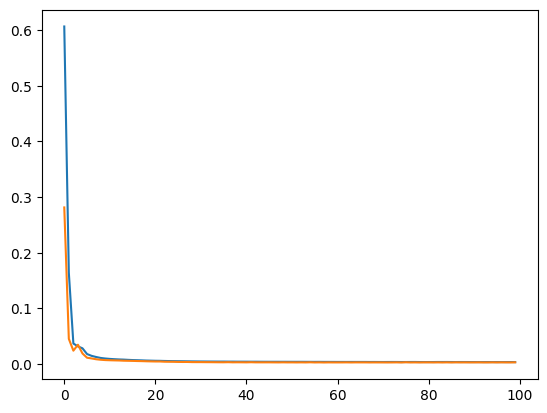

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

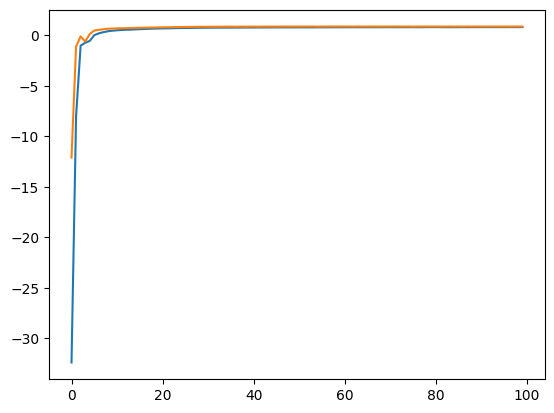

In [29]:
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])